# Iteration 2 - Melbourne Free WiFi Access Point
This Jupyter Notebook is about preparing 'Melbourne Free Wifi Access Point' CSV file for being used in Mo-Buddy Website Solution.
1. Read Raw Data
2. Clean Raw Data
3. Export Clean Data

In [1]:
# Import Packages
import pandas as pd
import re

In [2]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

## 1. Read in Raw Data from a CSV file

In [3]:
# Function for reading in raw data from a CSV file
def read_in_data(file_path):
    """
    Function for reading in raw data from CSV file.
    Inputs: 
        - file_Path, type: string, desc: CSV file path
    Outputs:
        - raw_data, type: dataframe, desc: Raw data
    """

    raw_data = pd.read_csv(file_path)
    
    return raw_data

In [4]:
# Read in data
filepath_raw_data = 'DataBases\Victoria_Free_WiFi_Access_Point_2020.csv'
df_raw_freewifi = read_in_data(filepath_raw_data)

In [5]:
# Check how the dataframe looks like
df_raw_freewifi

,Name,Long Name,Latitude,Longitude,Type,Status
0,MEL-0001,MEL-0001-DOCKLANDS DR (SOUTH),-37.814671,144.938586,Fibre,FUTURE
1,MEL-0008,MEL-0008-VICTOR HABOUR PROM,-37.815686,144.939954,Mesh,FUTURE
2,MEL-0051,MEL-0051-ELIZABETH ST & BOURKE ST,-37.814409,144.963048,Fibre,UP
3,MEL-0083,MEL-0083-179 Collins Street,-37.815209,144.967911,Fibre,UP
4,MEL-0203,MEL-0203-QUEENS BRIDGE,-37.821666,144.961152,Mesh,UP
...,...,...,...,...,...,...
512,MEL-1020,MEL-1020-Corner Elizabeth and Therry Streets,-37.806955,144.959954,Fibre,UP
513,MEL-1021,MEL-1021-NE Corner Flinders and Spencer Streets,-37.820883,144.955351,Fibre,UP
514,MEL-1022,MEL-1022-300 Lonsdale Street,-37.811871,144.963309,Fibre,UP
515,MEL-1024,MEL-1024-Outside 288 Queen Street,-37.811813,144.959404,Fibre,UP


## 2. Clean up Raw Data

In [6]:
df_freewifi = df_raw_freewifi.copy()

In [7]:
# Select only Melborune city
# Split 'Name' into 'Text' - Number
city_number = df_freewifi['Name'].str.split('-')
df_freewifi.insert(1, 'City', city_number.str[0])
df_freewifi.insert(2, 'Code', city_number.str[1])

In [8]:
# Check whether the dataframe is as expected
df_freewifi

,Name,City,Code,Long Name,Latitude,Longitude,Type,Status
0,MEL-0001,MEL,0001,MEL-0001-DOCKLANDS DR (SOUTH),-37.814671,144.938586,Fibre,FUTURE
1,MEL-0008,MEL,0008,MEL-0008-VICTOR HABOUR PROM,-37.815686,144.939954,Mesh,FUTURE
2,MEL-0051,MEL,0051,MEL-0051-ELIZABETH ST & BOURKE ST,-37.814409,144.963048,Fibre,UP
3,MEL-0083,MEL,0083,MEL-0083-179 Collins Street,-37.815209,144.967911,Fibre,UP
4,MEL-0203,MEL,0203,MEL-0203-QUEENS BRIDGE,-37.821666,144.961152,Mesh,UP
...,...,...,...,...,...,...,...,...
512,MEL-1020,MEL,1020,MEL-1020-Corner Elizabeth and Therry Streets,-37.806955,144.959954,Fibre,UP
513,MEL-1021,MEL,1021,MEL-1021-NE Corner Flinders and Spencer Streets,-37.820883,144.955351,Fibre,UP
514,MEL-1022,MEL,1022,MEL-1022-300 Lonsdale Street,-37.811871,144.963309,Fibre,UP
515,MEL-1024,MEL,1024,MEL-1024-Outside 288 Queen Street,-37.811813,144.959404,Fibre,UP


<AxesSubplot:>

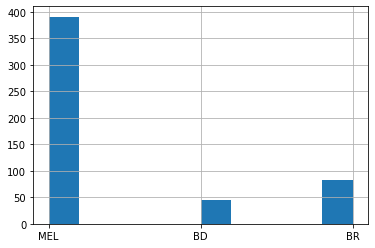

In [9]:
# Check what the cities are included in the dataframe
df_freewifi.City.hist()

In [10]:
# Select only Melborune city
df_freewifi = df_freewifi[df_freewifi['City']=='MEL']
df_freewifi

,Name,City,Code,Long Name,Latitude,Longitude,Type,Status
0,MEL-0001,MEL,0001,MEL-0001-DOCKLANDS DR (SOUTH),-37.814671,144.938586,Fibre,FUTURE
1,MEL-0008,MEL,0008,MEL-0008-VICTOR HABOUR PROM,-37.815686,144.939954,Mesh,FUTURE
2,MEL-0051,MEL,0051,MEL-0051-ELIZABETH ST & BOURKE ST,-37.814409,144.963048,Fibre,UP
3,MEL-0083,MEL,0083,MEL-0083-179 Collins Street,-37.815209,144.967911,Fibre,UP
4,MEL-0203,MEL,0203,MEL-0203-QUEENS BRIDGE,-37.821666,144.961152,Mesh,UP
...,...,...,...,...,...,...,...,...
512,MEL-1020,MEL,1020,MEL-1020-Corner Elizabeth and Therry Streets,-37.806955,144.959954,Fibre,UP
513,MEL-1021,MEL,1021,MEL-1021-NE Corner Flinders and Spencer Streets,-37.820883,144.955351,Fibre,UP
514,MEL-1022,MEL,1022,MEL-1022-300 Lonsdale Street,-37.811871,144.963309,Fibre,UP
515,MEL-1024,MEL,1024,MEL-1024-Outside 288 Queen Street,-37.811813,144.959404,Fibre,UP


In [11]:
# Check missing values
df_freewifi.isnull().sum()

Name         0
City         0
Code         0
Long Name    0
Latitude     0
Longitude    0
Type         0
Status       0
dtype: int64

In [12]:
# Split 'Long Name' into 'Name_code' + 'Address'
name_address = df_freewifi['Long Name'].str.extract(r'(?<=MEL-\d{4}-)(.+)(?=)')
df_freewifi.insert(4, 'freewifi_address', name_address)

In [13]:
# Check whether the dataframe is as expected
df_freewifi

,Name,City,Code,Long Name,freewifi_address,Latitude,Longitude,Type,Status
0,MEL-0001,MEL,0001,MEL-0001-DOCKLANDS DR (SOUTH),DOCKLANDS DR (SOUTH),-37.814671,144.938586,Fibre,FUTURE
1,MEL-0008,MEL,0008,MEL-0008-VICTOR HABOUR PROM,VICTOR HABOUR PROM,-37.815686,144.939954,Mesh,FUTURE
2,MEL-0051,MEL,0051,MEL-0051-ELIZABETH ST & BOURKE ST,ELIZABETH ST & BOURKE ST,-37.814409,144.963048,Fibre,UP
3,MEL-0083,MEL,0083,MEL-0083-179 Collins Street,179 Collins Street,-37.815209,144.967911,Fibre,UP
4,MEL-0203,MEL,0203,MEL-0203-QUEENS BRIDGE,QUEENS BRIDGE,-37.821666,144.961152,Mesh,UP
...,...,...,...,...,...,...,...,...,...
512,MEL-1020,MEL,1020,MEL-1020-Corner Elizabeth and Therry Streets,Corner Elizabeth and Therry Streets,-37.806955,144.959954,Fibre,UP
513,MEL-1021,MEL,1021,MEL-1021-NE Corner Flinders and Spencer Streets,NE Corner Flinders and Spencer Streets,-37.820883,144.955351,Fibre,UP
514,MEL-1022,MEL,1022,MEL-1022-300 Lonsdale Street,300 Lonsdale Street,-37.811871,144.963309,Fibre,UP
515,MEL-1024,MEL,1024,MEL-1024-Outside 288 Queen Street,Outside 288 Queen Street,-37.811813,144.959404,Fibre,UP


In [14]:
# Check length of freewifi_address
df_freewifi.insert(5, 'freewifi_address_len', df_freewifi['freewifi_address'].str.len())
df_freewifi['freewifi_address_len'].sort_values(ascending=True)

165     5.0
471     6.0
5       7.0
152     7.0
153     7.0
       ... 
249    55.0
164    55.0
509    55.0
262    61.0
197     NaN
Name: freewifi_address_len, Length: 391, dtype: float64

In [15]:
# Check missing values
df_freewifi.isnull().sum()

Name                    0
City                    0
Code                    0
Long Name               0
freewifi_address        1
freewifi_address_len    1
Latitude                0
Longitude               0
Type                    0
Status                  0
dtype: int64

In [16]:
# Check the row with missing values
df_freewifi[df_freewifi['freewifi_address'].isnull()]

,Name,City,Code,Long Name,freewifi_address,freewifi_address_len,Latitude,Longitude,Type,Status
197,MEL-0215,MEL,0215,MEL-FLINDERS ST,NaN,NaN,-37.820415,144.9578,Fibre,UP


In [17]:
# Assign value according to Long Name
null_value = df_freewifi['freewifi_address'].isnull()
df_freewifi.loc[null_value,'freewifi_address'] = 'FLINDERS ST'

C:\Users\Henry\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [18]:
df_freewifi[df_freewifi['Name']=='MEL-0215']

,Name,City,Code,Long Name,freewifi_address,freewifi_address_len,Latitude,Longitude,Type,Status
197,MEL-0215,MEL,0215,MEL-FLINDERS ST,FLINDERS ST,NaN,-37.820415,144.9578,Fibre,UP


In [19]:
# Check missing values
df_freewifi.isnull().sum()

Name                    0
City                    0
Code                    0
Long Name               0
freewifi_address        0
freewifi_address_len    1
Latitude                0
Longitude               0
Type                    0
Status                  0
dtype: int64

In [20]:
# Give format to Address (Capital first letter)
df_freewifi.loc[:,'freewifi_address'] = df_freewifi.loc[:,'freewifi_address'].str.title()
df_freewifi

C:\Users\Henry\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Name,City,Code,Long Name,freewifi_address,freewifi_address_len,Latitude,Longitude,Type,Status
0,MEL-0001,MEL,0001,MEL-0001-DOCKLANDS DR (SOUTH),Docklands Dr (South),20.0,-37.814671,144.938586,Fibre,FUTURE
1,MEL-0008,MEL,0008,MEL-0008-VICTOR HABOUR PROM,Victor Habour Prom,18.0,-37.815686,144.939954,Mesh,FUTURE
2,MEL-0051,MEL,0051,MEL-0051-ELIZABETH ST & BOURKE ST,Elizabeth St & Bourke St,24.0,-37.814409,144.963048,Fibre,UP
3,MEL-0083,MEL,0083,MEL-0083-179 Collins Street,179 Collins Street,18.0,-37.815209,144.967911,Fibre,UP
4,MEL-0203,MEL,0203,MEL-0203-QUEENS BRIDGE,Queens Bridge,13.0,-37.821666,144.961152,Mesh,UP
...,...,...,...,...,...,...,...,...,...,...
512,MEL-1020,MEL,1020,MEL-1020-Corner Elizabeth and Therry Streets,Corner Elizabeth And Therry Streets,35.0,-37.806955,144.959954,Fibre,UP
513,MEL-1021,MEL,1021,MEL-1021-NE Corner Flinders and Spencer Streets,Ne Corner Flinders And Spencer Streets,39.0,-37.820883,144.955351,Fibre,UP
514,MEL-1022,MEL,1022,MEL-1022-300 Lonsdale Street,300 Lonsdale Street,20.0,-37.811871,144.963309,Fibre,UP
515,MEL-1024,MEL,1024,MEL-1024-Outside 288 Queen Street,Outside 288 Queen Street,25.0,-37.811813,144.959404,Fibre,UP


In [21]:
# Keeep only usefull columns
useful_column = ['Name', 'freewifi_address', 'Latitude', 'Longitude', 'Status']
df_freewifi = df_freewifi.loc[:,useful_column]

In [22]:
# Check whether the dataframe is as expected
df_freewifi

,Name,freewifi_address,Latitude,Longitude,Status
0,MEL-0001,Docklands Dr (South),-37.814671,144.938586,FUTURE
1,MEL-0008,Victor Habour Prom,-37.815686,144.939954,FUTURE
2,MEL-0051,Elizabeth St & Bourke St,-37.814409,144.963048,UP
3,MEL-0083,179 Collins Street,-37.815209,144.967911,UP
4,MEL-0203,Queens Bridge,-37.821666,144.961152,UP
...,...,...,...,...,...
512,MEL-1020,Corner Elizabeth And Therry Streets,-37.806955,144.959954,UP
513,MEL-1021,Ne Corner Flinders And Spencer Streets,-37.820883,144.955351,UP
514,MEL-1022,300 Lonsdale Street,-37.811871,144.963309,UP
515,MEL-1024,Outside 288 Queen Street,-37.811813,144.959404,UP


In [23]:
# Include free wifi id (created)
df_freewifi.insert(0, 'freewifi_id', 'WIFI-')
df_freewifi.insert(1, 'freewifi_id_', range(1,len(df_freewifi)+1))

In [24]:
# Check whether the dataframe is as expected
df_freewifi.head()

,freewifi_id,freewifi_id_,Name,freewifi_address,Latitude,Longitude,Status
0,WIFI-,1,MEL-0001,Docklands Dr (South),-37.814671,144.938586,FUTURE
1,WIFI-,2,MEL-0008,Victor Habour Prom,-37.815686,144.939954,FUTURE
2,WIFI-,3,MEL-0051,Elizabeth St & Bourke St,-37.814409,144.963048,UP
3,WIFI-,4,MEL-0083,179 Collins Street,-37.815209,144.967911,UP
4,WIFI-,5,MEL-0203,Queens Bridge,-37.821666,144.961152,UP


In [25]:
# Include freewifi id (created)
df_freewifi = df_freewifi.astype({'freewifi_id_':str})
df_freewifi['freewifi_id'] = df_freewifi['freewifi_id'] + df_freewifi['freewifi_id_']

In [26]:
# Check whether the dataframe is as expected
df_freewifi.head()

,freewifi_id,freewifi_id_,Name,freewifi_address,Latitude,Longitude,Status
0,WIFI-1,1,MEL-0001,Docklands Dr (South),-37.814671,144.938586,FUTURE
1,WIFI-2,2,MEL-0008,Victor Habour Prom,-37.815686,144.939954,FUTURE
2,WIFI-3,3,MEL-0051,Elizabeth St & Bourke St,-37.814409,144.963048,UP
3,WIFI-4,4,MEL-0083,179 Collins Street,-37.815209,144.967911,UP
4,WIFI-5,5,MEL-0203,Queens Bridge,-37.821666,144.961152,UP


In [27]:
# Rename columns accordingly with format
df_freewifi.rename(columns={'Name':'freewifi_name', 'Latitude':'freewifi_latitude', 
                            'Longitude':'freewifi_longitude', 'Status':'freewifi_status'}, inplace=True)

In [28]:
# Check whether the dataframe is as expected
df_freewifi.head()

,freewifi_id,freewifi_id_,freewifi_name,freewifi_address,freewifi_latitude,freewifi_longitude,freewifi_status
0,WIFI-1,1,MEL-0001,Docklands Dr (South),-37.814671,144.938586,FUTURE
1,WIFI-2,2,MEL-0008,Victor Habour Prom,-37.815686,144.939954,FUTURE
2,WIFI-3,3,MEL-0051,Elizabeth St & Bourke St,-37.814409,144.963048,UP
3,WIFI-4,4,MEL-0083,179 Collins Street,-37.815209,144.967911,UP
4,WIFI-5,5,MEL-0203,Queens Bridge,-37.821666,144.961152,UP


In [29]:
# Selet only usefull columns
useful_column = ['freewifi_id', 'freewifi_name', 'freewifi_address', 'freewifi_status', 'freewifi_latitude', 
                 'freewifi_longitude']
df_freewifi = df_freewifi.loc[:,useful_column]

In [32]:
# Check whether the dataframe is as expected
df_freewifi.head()

,freewifi_id,freewifi_name,freewifi_address,freewifi_status,freewifi_latitude,freewifi_longitude
0,WIFI-1,MEL-0001,Docklands Dr (South),FUTURE,-37.814671,144.938586
1,WIFI-2,MEL-0008,Victor Habour Prom,FUTURE,-37.815686,144.939954
2,WIFI-3,MEL-0051,Elizabeth St & Bourke St,UP,-37.814409,144.963048
3,WIFI-4,MEL-0083,179 Collins Street,UP,-37.815209,144.967911
4,WIFI-5,MEL-0203,Queens Bridge,UP,-37.821666,144.961152


In [33]:
# Rename columns accordingly with format
df_freewifi.rename(columns={'freewifi_id':'id', 'freewifi_name':'name', 'freewifi_address':'address', 
                            'freewifi_status':'status', 'freewifi_latitude':'latitude', 
                            'freewifi_longitude':'longitude'}, inplace=True)

In [34]:
# Check whether the dataframe is as expected
df_freewifi.head()

,id,name,address,status,latitude,longitude
0,WIFI-1,MEL-0001,Docklands Dr (South),FUTURE,-37.814671,144.938586
1,WIFI-2,MEL-0008,Victor Habour Prom,FUTURE,-37.815686,144.939954
2,WIFI-3,MEL-0051,Elizabeth St & Bourke St,UP,-37.814409,144.963048
3,WIFI-4,MEL-0083,179 Collins Street,UP,-37.815209,144.967911
4,WIFI-5,MEL-0203,Queens Bridge,UP,-37.821666,144.961152


## 3. Export Clean Data to a CSV file

In [35]:
# Export full version
df_freewifi.to_csv('Output\FreeWiFi\OK_Free_WiFi_Melbourne_V3.csv', index=False)